# Simple Neural Network using PyTorch #

Author: ****Pier Luca Anania****

In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In this example we're going to use **Iris Dataset**

In [6]:
import torch
import torch.nn as nn                   #Neural Network
import torch.nn.functional as F         #to move data forward in our function

Create a model class that inherits _nn.Module_

In [13]:
class Model(nn.Module):
    
    '''Structure:
    - Input Layer (4 features of the flower: sepal lenght/width, petal lenght/width)
    - Hidden Layer 1 := H1 (# of neurons)
    - H2 (# of neurons)
    - Output Layer (3 classes of Iris flowers: Iris Setosa/Versicolour/Virginica)
    '''
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        
        super().__init__()                                 #instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)              #fc := fully connected
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):       #function to move everything forward
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x


Pick a manual seed for randomization

In [14]:
torch.manual_seed(41)

Create an instance of our Model

In [15]:
model = Model()

## Working with Data

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [37]:
#Visualize different elements of variety

my_df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [38]:
#Encoding variety column: str --> int

my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

my_df['variety'].unique()

array([0., 1., 2.])

Train Test Split ---> set X,y

In [55]:
X = my_df.drop('variety', axis=1)    #Select features w/o variety
y = my_df['variety']

Convert the dataframe into numpy arrays

In [56]:
X = X.values
y = y.values

Start work on NN

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,        
                                                    random_state=41)     # % of test data

Convert X features to Tensor with float numbers

In [58]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

Convert y labels to Tensor Long

In [59]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Set the criterion to measure the error, how far off the predictions are from the data

In [62]:
criterion = nn.CrossEntropyLoss()

Choose ADAM optimizer: lr := learning rate

In [63]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.parameters #just to show

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

Train model:

number of Epochs -- Epoch is one run thru all the training data in our network

In [75]:
epochs = 200
losses = []

for i in range(epochs):
    
    #Go forward and get prediction
    y_pred = model.forward(X_train)
    
    #Measure the loss: predicted values - trained values
    loss = criterion(y_pred, y_train)
    
    #Keep track of our losses
    losses.append(loss.detach().numpy())
    
    #Print every 10 Epochs
    if i%10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
    
    #Backpropagation -> fine tuning of the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.05286872759461403
Epoch: 10 Loss: 0.04508011043071747
Epoch: 20 Loss: 0.03979313746094704
Epoch: 30 Loss: 0.03596426174044609
Epoch: 40 Loss: 0.033027999103069305
Epoch: 50 Loss: 0.030512522906064987
Epoch: 60 Loss: 0.027733536437153816
Epoch: 70 Loss: 0.02461211010813713
Epoch: 80 Loss: 0.021672355011105537
Epoch: 90 Loss: 0.019320257008075714
Epoch: 100 Loss: 0.017492903396487236
Epoch: 110 Loss: 0.01604403369128704
Epoch: 120 Loss: 0.01484010647982359
Epoch: 130 Loss: 0.013800365850329399
Epoch: 140 Loss: 0.012879195623099804
Epoch: 150 Loss: 0.012144872918725014
Epoch: 160 Loss: 0.011602848768234253
Epoch: 170 Loss: 0.010984020307660103
Epoch: 180 Loss: 0.01027061976492405
Epoch: 190 Loss: 0.009707191027700901


Graph

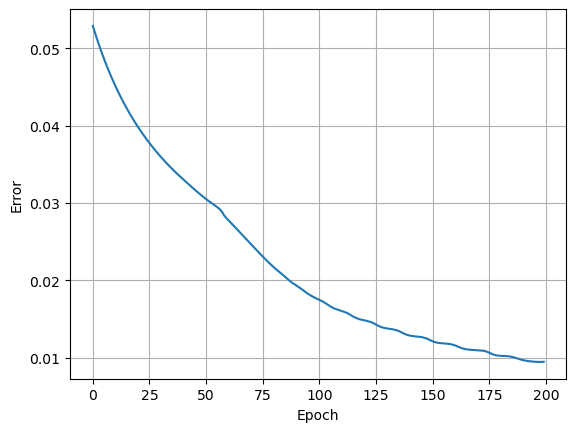

In [78]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()